In [9]:
import uuid

import cv2
import numpy as np
from PIL import Image
from pyzbar import pyzbar
import imutils

from matplotlib import pyplot as plt

### Extract Info

In [10]:
def extract_data(image_ndarray):
    barcodes = pyzbar.decode(image_ndarray)

    codes_info = []

    for barcode in barcodes:
        type = barcode.type
        info = barcode.data.decode("utf-8")
        rect = barcode.rect
        x, y, w, h = rect
        bounded_img = image_ndarray[y : y + h, x : x + w]
        codes_info.append({"type": type, "info": info, "rect": barcode.rect, "bounded_img": bounded_img})
    return codes_info

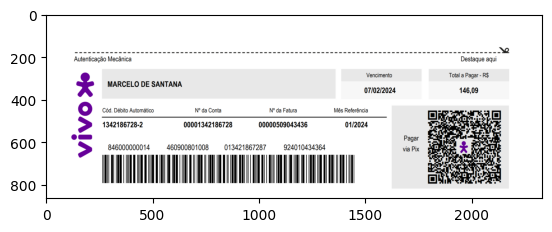

In [11]:
img = Image.open("../examples/image1.png")
image_ndarray = np.asarray(img)

plt.imshow(image_ndarray)

Type: QRCODE Data: 00020101021226850014br.gov.bcb.pix2563pix.santander.com.br/qr/v2/6a7f3ec7-7be1-4958-adcf-1e8379926cd052040000530398654041.005802BR5917TELEFONICA BRASIL6009SAO PAULO62070503***630442A8


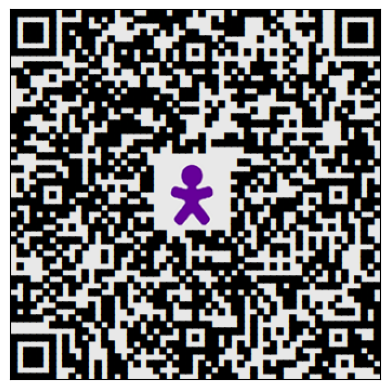

Type: I25 Data: 84600000001460900801000134218672892401043436


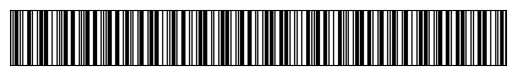

In [12]:
image_ndarray = np.asarray(img)
codes_info = extract_data(image_ndarray)

for code in codes_info:
    print(f"Type: {code['type']} Data: {code['info']}")
    plt.imshow(code['bounded_img'])
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

### Rotation

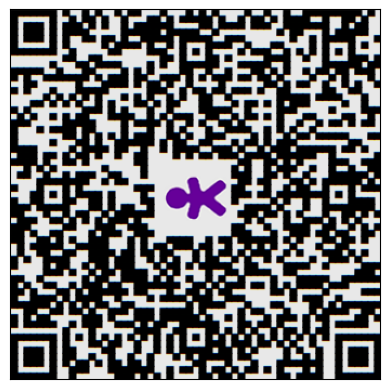

In [13]:
# rotate the image and display it
rotated = imutils.rotate(codes_info[0]['bounded_img'], angle=90)
plt.imshow(rotated)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()


## Resize image

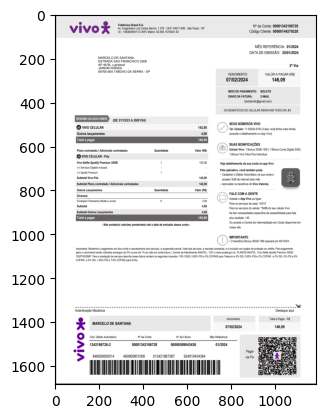

In [15]:
img = Image.open("../examples/image2.png")
image_ndarray = np.asarray(img)

plt.imshow(image_ndarray)

1683


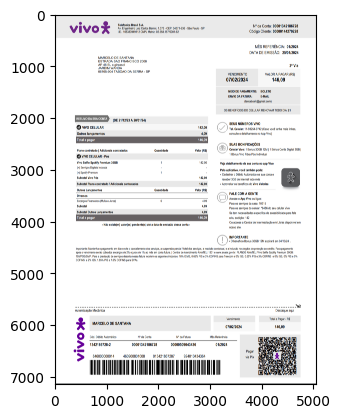

In [28]:
width, height, layers = image_ndarray.shape
print(width)
# resize the image and display it
resized = imutils.resize(image_ndarray, width=width * 3)
plt.imshow(resized)

Type: QRCODE Data: 00020101021226850014br.gov.bcb.pix2563pix.santander.com.br/qr/v2/6a7f3ec7-7be1-4958-adcf-1e8379926cd052040000530398654041.005802BR5917TELEFONICA BRASIL6009SAO PAULO62070503***630442A8


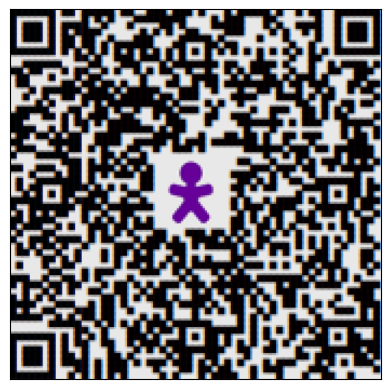

In [29]:
codes_info = extract_data(resized)

for code in codes_info:
    print(f"Type: {code['type']} Data: {code['info']}")
    plt.imshow(code['bounded_img'])
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

In [35]:
bd = cv2.barcode.BarcodeDetector()
img = cv2.imread("../examples/image2.png")
ok, decoded_info, decoded_type, corners = bd.detectAndDecode(img)
print(ok, decoded_info, decoded_type, corners)

ValueError: not enough values to unpack (expected 4, got 3)